## Problem #2

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
def sin_function(x, n):
    # Appoximation equals the sum from 0 to n of (-1)^n(x^(2n+1))/((2n+1)!)

    approx = 0
    for i in range(n):
        var1 = (-1)**i                              # (-1)^n
        var2 = x**(2*i+1) #numerator
        var3 = math.factorial(2*i+1) # denominator  # (x^(2n+1))
        approx = approx + (var1 * (var2 / var3))    # ((2n+1)!)
        
    return approx


In [4]:
# Talor expansion approximation for first eight at x=0
for i in range(1,9):
    print(sin_function(0,i))


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


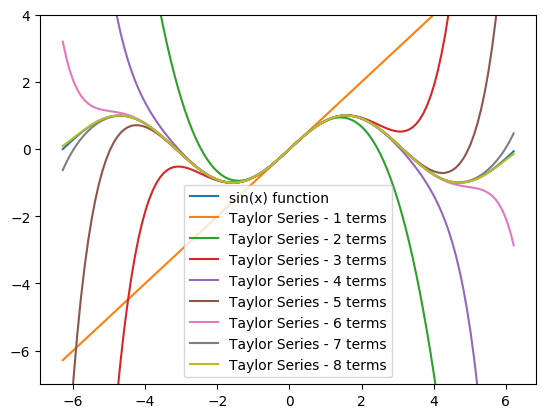

In [5]:
angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_sin = np.sin(angles)

fig, ax = plt.subplots()
ax.plot(angles,p_sin)

# add lines
for i in range(1,9):
    t_sin = [sin_function(angle,i) for angle in angles]
    ax.plot(angles,t_sin)

ax.set_ylim([-7,4]) #restricting y axis

# setting up legend
legend_l = ['sin(x) function']
for i in range(1,9):
    legend_l.append(f'Taylor Series - {i} terms')
ax.legend(legend_l)
plt.show()

From this plot I observe that as the numer of terms increases the closer the funciton gets to the actual sin(x) function. All the approximations are also almost exact around x=0 but get less accurate around pi/2.

In [6]:
def accuracyFunction(x,n,error,levelOfAccuracy):
    if(error <= levelOfAccuracy):
        print('It takes '+str(n)+' term(s) to get to a level of accuracy of '+str(levelOfAccuracy)+'.')
        return n
    else:
        sin_approx = sin_function(x,n)
        sin_real = np.sin(x)
        sin_error = abs(sin_approx - sin_real)
        # print("n: "+str(n))
        # print("Sin Approx: "+str(sin_approx))
        # print("Sin Real: "+str(sin_real))
        # print("Sin Error: "+str(sin_error))
        return accuracyFunction(x,n+1,sin_error,levelOfAccuracy)
        

In [7]:
x_test = np.pi*2
x_error = abs(x_test - 0)
error1 = 1 * 10**(-4)
accuracyFunction(x_test,0,x_error,error1)

It takes 1 term(s) to get to a level of accuracy of 0.0001.


1

In [8]:
x_test = np.pi*2
x_error = abs(x_test - 0)
error2 = 1 * 10**(-12)
accuracyFunction(x_test,0,x_error,error2)

It takes 1 term(s) to get to a level of accuracy of 1e-12.


1

## Problem #3
### A)

In [9]:
def mantissa(bk):
    bitCount = len(bk) #bit count for matissa
    mantissa_count = 0.0
    for i in range(bitCount):
        mantissa_count += bk[i]*2.0**(-i)
    return mantissa_count

def exponent(uk):
    bitCount = len(uk)
    exponent_count = 0.0
    for i in range(bitCount):
        exponent_count += uk[i]*2.0**(i)
    return exponent_count




As discussed in lecture the mantissa has a bit length of 23+1 for floating point numbers and 52+1 for doubles while the exponent has a bit length of 7+1 for floating point numbers and 10+1 for doubles.

However, we will ignore the +1 for the mantissa for part a) as we are only focused on positive values and therefore it is 1. For the smallest value the +1 bit for the exponent will be negative(0) and the for the largest value the +1 bit for the exponent will be positive(1).

In [10]:
def smallestPositiveValue(m,e):
    minimum = mantissa(m)*2**(-1*exponent(e)) # negative 1 here as this will bring to be smallest value
    minimum_og = minimum
    
    m_original = np.copy(m)
    e_original = np.copy(e)
    
    for i in range(len(m)):
        temp_m0 = np.copy(m)
        temp_m1 = np.copy(m)
        temp_m0[i] = 0
        temp_m1[i] = 1
        temp_min0 = mantissa(temp_m0)*2**(-1*exponent(e))
        temp_min1 = mantissa(temp_m1)*2**(-1*exponent(e))
        
        
        if minimum > temp_min0 and temp_min0 > 0.0: #If changing to a 0 reduces the value without making it 0
            m = np.copy(temp_m0)
            minimum = temp_min0
           
        elif minimum > temp_min1 and temp_min1 > 0.0: #If changing to a 1 reduces the value without making it 0
            m = np.copy(temp_m1)
            minimum = temp_min1

    for i in range(len(e)):
        temp_e0 = np.copy(e)
        temp_e1 = np.copy(e)
        temp_e0[i] = 0
        temp_e1[i] = 1
        temp_min0 = mantissa(m)*2**(-1*exponent(temp_e0))
        temp_min1 = mantissa(m)*2**(-1*exponent(temp_e1))

        if (minimum > temp_min0 and temp_min0 > 0): #If changing to a 0 reduces the value without making it 0
            e = np.copy(temp_e0)
            minimum = temp_min0
        elif minimum > temp_min1 and temp_min1 > 0.0: #If changing to a 1 reduces the value without making it 0
            e = np.copy(temp_e1)
            minimum = temp_min1
        
    if(m[len(m)-1] == 0):   #this means there is a 1 earlier meaning it is not at its miniumum value
        index = np.where(m == 1)[0][0]
        m[index+1] = 1
        m = np.copy(smallestPositiveValue(m,e)[0])


    minimum_new = mantissa(m)*2**(-1*exponent(e))
    return m,e,minimum_og,minimum_new


In [11]:
# Finding float (32-bit) smallest positive number
m = np.random.randint(2, size=23)
e = np.random.randint(2, size=7)
y = smallestPositiveValue(m,e)
print('The smallest possible positive value value that can be represented in float percision is '+str(y[3]))

# testing n number of times to see if results vary
# If no text appears then the program is running optimally
n = 1000
y = np.zeros(n)
y[0] = smallestPositiveValue(np.random.randint(2, size=23),np.random.randint(2, size=7))[3]
for i in range(1,n):
    m = np.random.randint(2, size=23)
    e = np.random.randint(2, size=7)
    y[i] = smallestPositiveValue(m,e)[3]
    if(y[i-1] != y[i]):
        print('There is an issue with your program')
        print(y[i-1])
        print(y[i])

The smallest possible positive value value that can be represented in float percision is 1.401298464324817e-45


In [12]:
# Finding double (64-bit) smallest positive number
m = np.random.randint(2, size=52)
e = np.random.randint(2, size=10)
y = smallestPositiveValue(m,e)
print('The smallest possible positive value value that can be represented in double percision is '+str(y[3]))

# testing n number of times to see if results vary
# If no text appears then the program is running optimally
n = 1000
y = np.zeros(n)
y[0] = smallestPositiveValue(np.random.randint(2, size=52),np.random.randint(2, size=10))[3]
for i in range(1,n):
    m = np.random.randint(2, size=52)
    e = np.random.randint(2, size=10)
    y[i] = smallestPositiveValue(m,e)[3]
    if(y[i-1] != y[i]):
        print('There is an issue with your program')
        print(y[i-1])
        print(y[i])

The smallest possible positive value value that can be represented in double percision is 5e-324


In [13]:
def largestPositiveValue(m,e):
    max = mantissa(m)*2**(1*exponent(e)) # positive 1 here as this will bring to be smallest value
    max_og = max

    m_original = np.copy(m)
    e_original = np.copy(e)
    
    for i in range(len(m)):
        temp_m0 = np.copy(m)
        temp_m1 = np.copy(m)
        temp_m0[i] = 0
        temp_m1[i] = 1
        temp_max0 = mantissa(temp_m0)*2**(1*exponent(e))
        temp_max1 = mantissa(temp_m1)*2**(1*exponent(e))
        
        
        if max < temp_max0 and temp_max0 > 0.0: #If changing to a 0 increases the value 
            m = np.copy(temp_m0)
            max = temp_max0
           
        elif max < temp_max1 and temp_max1 > 0.0: #If changing to a 1 increases the value
            m = np.copy(temp_m1)
            max = temp_max1
            
    for i in range(len(e)):
        temp_e0 = np.copy(e)
        temp_e1 = np.copy(e)
        temp_e0[i] = 0
        temp_e1[i] = 1
        temp_max0 = mantissa(m)*2**(1*exponent(temp_e0))
        temp_max1 = mantissa(m)*2**(1*exponent(temp_e1))

        if (max < temp_max0 and temp_max0 > 0): #If changing to a 0 increases the value
            e = np.copy(temp_e0)
            max = temp_max0
        elif max < temp_max1 and temp_max1 > 0.0: #If changing to a 1 increases the value
            e = np.copy(temp_e1)
            max = temp_max1

    max_new = mantissa(m)*2**(1*exponent(e))
    return m,e,max_og,max_new

In [14]:
# Finding float (32-bit) largest positive number
m = np.random.randint(2, size=23)
e = np.random.randint(2, size=7)
y = largestPositiveValue(m,e)
print('The largest possible positive value value that can be represented in float percision is '+str(y[3]))


# testing n number of times to see if results vary
# If no text appears then the program is running optimally
n = 1000
y = np.zeros(n)
y[0] = largestPositiveValue(np.random.randint(2, size=23),np.random.randint(2, size=7))[3]
for i in range(1,n):
    m = np.random.randint(2, size=23)
    e = np.random.randint(2, size=7)
    y[i] = largestPositiveValue(m,e)[3]
    if(y[i-1] != y[i]):
        print('There is an issue with your program')
        print(y[i-1])
        print(y[i])

The largest possible positive value value that can be represented in float percision is 3.4028232635611926e+38


In [15]:
# Finding double (64-bit) largest positive number
m = np.random.randint(2, size=52)
e = np.random.randint(2, size=10)
y = largestPositiveValue(m,e)
print('The largest possible positive value value that can be represented in double percision is '+str(y[3]))


# testing n number of times to see if results vary
# If no text appears then the program is running optimally
n = 1000
y = np.zeros(n)


y[0] = largestPositiveValue(np.random.randint(2, size=52),np.random.randint(2, size=10))[3]
for i in range(1,n):
    m = np.random.randint(2, size=52)
    e = np.random.randint(2, size=10)
    y[i] = largestPositiveValue(m,e)[3]
    
    if(y[i-1] != y[i]):
        print('There is an issue with your program')
        print(y[i-1])
        print(y[i])

The largest possible positive value value that can be represented in double percision is 1.7976931348623155e+308


### B)

In [171]:
def smallestPositiveValue_plusOne(m,e):
    minimum = mantissa(m)*2**(-1*exponent(e)) # negative 1 here as this will bring to be smallest value
    minimum_og = minimum
    
    m_original = np.copy(m)
    e_original = np.copy(e)
    
    for i in range(len(m)):
        temp_m0 = np.copy(m)
        temp_m1 = np.copy(m)
        temp_m0[i] = 0
        temp_m1[i] = 1
        temp_min0 = mantissa(temp_m0)*2**(-1*exponent(e))
        temp_min1 = mantissa(temp_m1)*2**(-1*exponent(e))
        
        
        if minimum > temp_min0 and temp_min0 > 0.0 and 1.0+temp_min0 != 1:
            m = np.copy(temp_m0)
            minimum = temp_min0
           
        elif minimum > temp_min1 and temp_min1 > 0.0 and 1.0+temp_min1 != 1:
            m = np.copy(temp_m1)
            minimum = temp_min1
            

    for i in range(len(e)):
        temp_e0 = np.copy(e)
        temp_e1 = np.copy(e)
        temp_e0[i] = 0
        temp_e1[i] = 1
        temp_min0 = mantissa(m)*2**(-1*exponent(temp_e0))
        temp_min1 = mantissa(m)*2**(-1*exponent(temp_e1))

        if (minimum > temp_min0 and temp_min0 > 0 and 1.0+temp_min0 != 0):
            e = np.copy(temp_e0)
            minimum = temp_min0
        elif minimum > temp_min1 and temp_min1 > 0.0 and 1.0+temp_min1 != 1:
            e = np.copy(temp_e1)
            minimum = temp_min1
    
    if(m[len(m)-1] == 0):   #this means there is a 1 earlier meaning it is not at its miniumum value
        index = np.where(m == 1)[0][0]
        temp_m = np.copy(m)
        temp_m[index+1] = 1
        temp_m[index] = 0
        if(mantissa(temp_m)*2**(-1*exponent(e))+1.0 != 1):
            m = np.copy(smallestPositiveValue_plusOne(temp_m,e)[0])


    minimum_new = mantissa(m)*2**(-1*exponent(e))
    return m,e,minimum_og,minimum_new
  


 


In [185]:
# Finding float (32-bit) smallest positive number added to 1 such that the result is different from 1
m = np.zeros(23)
m[0] = 1
m[8]=1
e = np.zeros(7)
e[0] = 1
y = smallestPositiveValue_plusOne(m,e)

print('The smallest possible positive value value that can be represented in float percision and added to 1 to make it different from 1 is '+str(y[3])+'. This consists of mantissa '+str(y[0])+' and exponent '+str(y[1]))

The smallest possible positive value value that can be represented in float percision and added to 1 to make it different from 1 is 2.220446049250313e-16. This consists of mantissa [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] and exponent [1. 1. 1. 1. 1. 0. 0.]


### C)

There are floating point numbers in for $x_{1}$ and $x_{2}$ in which we can plug into the left side of the equation such that they equal the right side. These include any $x_{1}$ or $x_{2}$ which is 1 + Z where Z is a floating point number less than the smallest possible postive value that can be represented in float percisions and added to 1 such that it makes it different from 1. In other words Z < 2.220446049250313e-16.

## Problem #4
### A)

In [188]:
e = y[3]
val = (1 + (e/2.0)) - 1
print('The floating point value for a) is: '+str(val))

The floating point value for a) is: 0.0


### B)

In [190]:
val = 1 + (e/2.0 - 1)
print('The floating point value for b) is: '+str(val))

The floating point value for b) is: 1.1102230246251565e-16


### C)

In [191]:
val = 1 - 1 + e/2.0
print('The floating point value for c) is: '+str(val))

The floating point value for c) is: 1.1102230246251565e-16


Exact and floating point arithmetic differ as in floating point arithmetic if the values you are using are too great from one another then one of the values is treated as zero while in exact arithmetic we do not do this.

## Problem #5
### A)

In [143]:
def numeratorVal(n):
    if(n <=2):
        return 1
    else:   
        return (2*n-1)*numeratorVal(n-1)

def derivativeOfG(x,n): #n is the number of derivatives taken
    val = -1000000
    if n == 0:
        val = x**0.5
    else:
        # val = ((-1)**(n-1))*(math.factorial(2*n-1))*(x**(0.5-n))/((math.factorial(n-1))*(2**(2*n-1)))
        val = ((-1)**(n-1))*(numeratorVal(n)/(2**n))*(x**((-1)*(2*n-1)/2))
    return val
        


def g_x(x,n,accuracy):
    x_not = 1
    approx = math.sqrt(x_not)
    real = math.sqrt(x)
    count = -1
    for k in range(1,n):
        approx += (1.0/math.factorial(k))*(derivativeOfG(x_not,k))*((x-x_not)**k)
        if(abs(approx-real) < accuracy):
            count = k
            break

    return count,approx

In [158]:
n = 170
y = g_x(2,n,0.001)
z = g_x(2,n,0.00001)
w = g_x(2,n,0.0000000001)

#Number of operations per count
numOps = 3
print('Acutal square root of 2 is: '+str(2**0.5))
print('To get 3 digits of accuracy it takes the taylor series '+str(y[0]*numOps)+' primitive operations returning '+str(y[1]))
# print('To get 5 digits of accuracy it takes the taylor series '+str(z[0]*numOps)+' primitive operations returning '+str(z[1]))
# print('To get 10 digits of accuracy it takes the taylor series '+str(w[0]*numOps)+' primitive operations returning '+str(w[1]))
print('My computure could not get to 5 digits of accuracy')
print('My computure could not get to 10 digits of accuracy')



Acutal square root of 2 is: 1.4142135623730951
To get 3 digits of accuracy it takes the taylor series 84 primitive operations returning 1.4134297408514807
My computure could not get to 5 digits of accuracy
My computure could not get to 10 digits of accuracy


### B)

In [81]:
def f(x):
    return (x**2)-2
def df_dx(x):
    return 2*x

def newtons_method(x,accuracy):
    x_not = 1
    zero = 2**0.5
    count = 0
    x_i = x - (f(x) / df_dx(x))
    while x_i - zero > accuracy:
        count += 1
        x_i = x_i -(f(x_i) / df_dx(x_i))
    return count, x_i


In [85]:
y = newtons_method(2,0.001)
z = newtons_method(2,0.00001)
w = newtons_method(2,0.0000000001)
print('To get 3 digits of accuracy it takes newton\'s method '+str(y[0])+' primitive operations returning '+str(y[1]))
print('To get 5 digits of accuracy it takes newton\'s method '+str(z[0])+' primitive operations returning '+str(z[1]))
print('To get 10 digits of accuracy it takes newton\'s method '+str(w[0])+' primitive operations returning '+str(w[1]))

To get 3 digits of accuracy it takes newton's method 2 primitive operations returning 1.4142156862745099
To get 5 digits of accuracy it takes newton's method 2 primitive operations returning 1.4142156862745099
To get 10 digits of accuracy it takes newton's method 3 primitive operations returning 1.4142135623746899


## Problem #6
### A)

In [ ]:
def f(x):
    return (x**25 -1)

def df(x):
    return (25*x**24)

def newtonsMethod(x, accuracy):
    zero = 1 # zero of function
    count = 0
    x_i = x - (f(x) / df(x))
    while x_i - zero > accuracy:
        count += 1
        x_i = x_i -(f(x_i) / df(x_i))
    return count


In [ ]:
print('It will take '+ str(newtonsMethod(20,10**-8))+' iterations to achieve accuracy of 10^-8')

It will take 76 iterations to achieve accuracy of 10^-8


### B)

$e_{n}$ = $x_{i} - x^{*}$

$e_{n+1} \approx 0.5 \frac{f''(x^{*})}{f'(x^{*})} e_{i}^{2}$

As we can see convergence in this case is so slow because we are starting off with a larger error $e_{n}$ because we are not in the neighborhood of the correct zero value. This causes $e_{n+1}$ to also be very large as it depends on the squared $e_{n}$ value meaning that the larger starting error remains significant for longer.


### C)

In [ ]:
def f2(x):
    return (x**3 -1)

def df2(x):
    return (2*x**3)

def newtonsMethod2(x, accuracy):
    zero = 1 # zero of function
    count = 0
    x_i = x - (f2(x) / df2(x))
    while x_i - zero > accuracy:
        count += 1
        x_i = x_i -(f2(x_i) / df2(x_i))
    return count

In [ ]:
print('It will take '+ str(newtonsMethod2(20,10**-8))+' iterations to achieve accuracy of 10^-8')

It will take 39 iterations to achieve accuracy of 10^-8
